<a href="https://colab.research.google.com/github/Sidhant-1299/Naive_bayes_spam_classification/blob/main/Naive_Bayes_Model_for_Spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Naive Bayes Model for Spam Classification

## Bayes Theorem

To understand Naive Bayes, we must first look at [Bayes' theorem](https://www.probabilitycourse.com/chapter1/1_4_3_bayes_rule.php):

### $$P(A|B) = \frac{P(A)⋅P(B|A)}{P(B)}$$

**Where :**\
$P(B)$ is the probablity of B occurring and\
$P(A|B)$ is the probablity of A occuring given that B has already occurred\
$P(A)$ is the probablity of A occurring and\
$P(B|A)$ is the probablity of B occuring given that A has already occurred

</br>

**In essence**, with Bayes' theorem we can find out the posterior probablity of an event B occuring given that event A has occurred if we know the proability of event A occuring, event B occurring and event A occurring given that event B occurred.

**For example**, in spam classification we know the probability of an event **S** being a spam mail and the probablity of the event **B** that the word Bitcoin is in a mail. And forutnately, we also know the probability of the event B given S i.e that if the mail is a spam the word 'Bitcoin' is there or not.

These are all probability that you can find if you've got a mail dataset which has an label of the mail being spam or not.

With this data what we would love to do is predict if the new email that we recieve is spam or not. And that can be done using Bayes' theorem. We can find the probablity that the email being spam given that the word 'Bitcoin' is in the email using all of the probablitiies that we've collected before.

### $$P(S|B) = \frac{P(S)⋅P(B|S)}{P(B)}$$

**Where :**\
$P(B)$ is the probablity of the word 'Bitcoin' being on the mail\
$P(S|B)$ is the probablity of the email being spam  given that 'Bitcoin' is in the mail\
$P(S)$ is the probablity of the mail being spam\
$P(B|S)$ is the probablity of 'Bitcoin' being on the mail given that the email is a spam



## Full Bayes theorem

### The Bayes' theorem can be further extended:

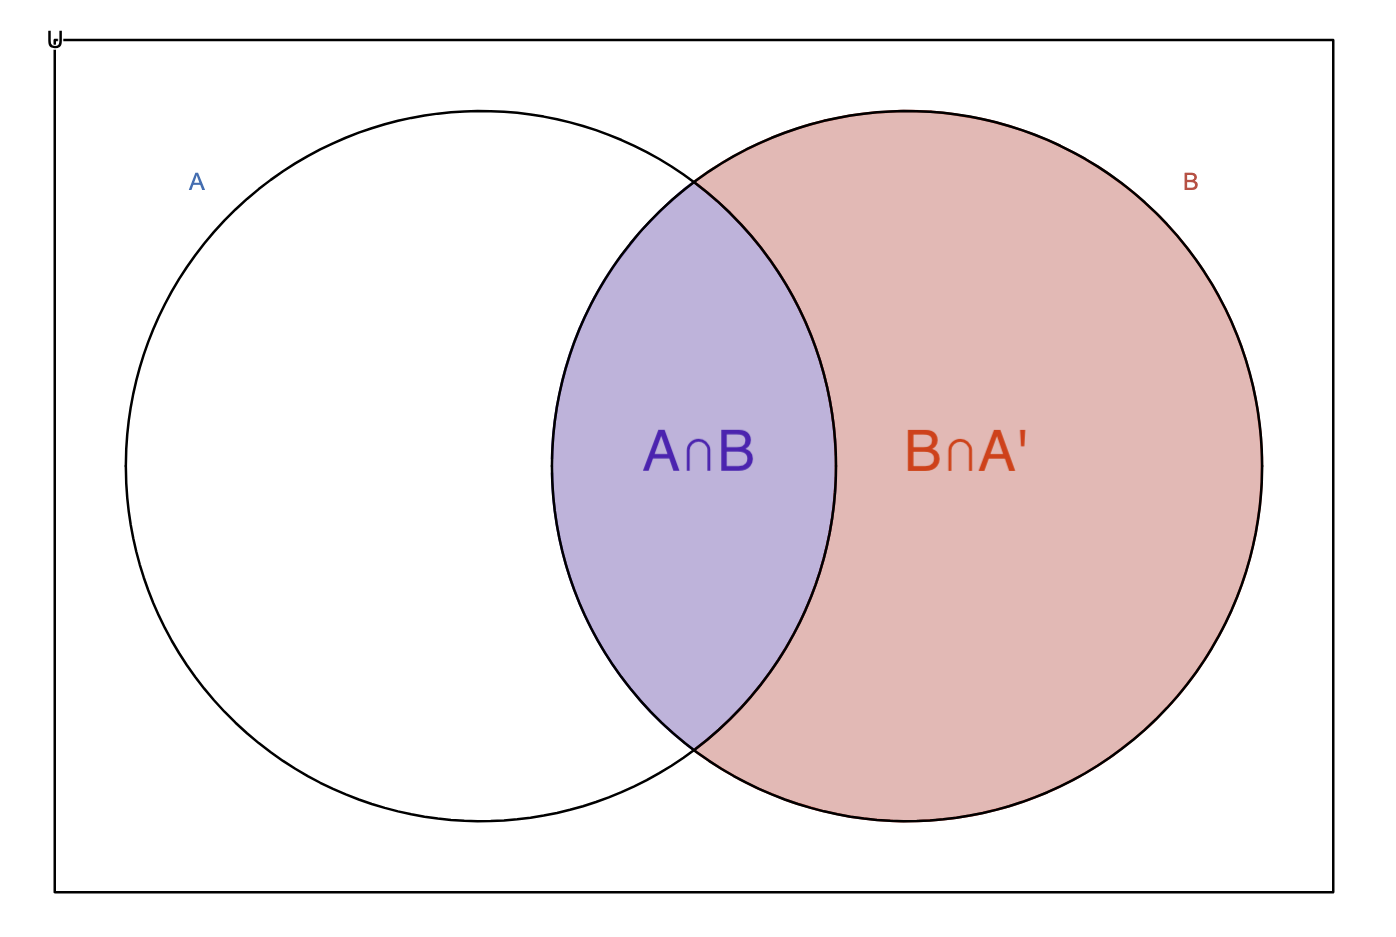


#### $$ P(A|B) = \frac{P(A)⋅P(B|A)}{P(B)} \tag{1}$$

From the venn diagram given above we can see that the set B can be represented as the union of two disjoint sets:
- $A∩B$
- $B∩Ã$

$$
P(B) = P\left( (A \cap B) \cup (B \cap \tilde{A}\:) \right) \tag{2}
$$

The [axioms of probability](https://www.probabilitycourse.com/chapter1/1_3_2_probability.php) state that if $ A_1, A_2, A_3, \ldots $ are disjoint events (sets), then

$$
P(A_1 \cup A_2 \cup A_3 \cup \ldots) = P(A_1) + P(A_2) + P(A_3) + \ldots\tag{3}
$$

<br/>

Since $A∩B$ and $B∩Ã\;$ are disjoint sets (they don't intersect) ; from $ (2)\;$and $\; (3)$:

$$P(B) = P(A \cap B) \: + \: P(B \cap \tilde{A}\:) \tag{4}$$

Now from eqn $(1)$ and $(4)$:

$$P(A|B) = \frac{P(A)⋅P(B|A)}{P(A \cap B) \: + \: P(B \cap \tilde{A}\:)} \tag{5}$$

Now using [conditional probablity](https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php) for the denominatior:


$$P(A|B) = \frac{P(A)⋅P(B|A)}{P(A)⋅P(B|A) \: + \: P(\tilde{A}\;)⋅P(B| \tilde{A}\;)} \tag{6}$$

### which is the **Full Bayes' Theorem**
----

## Naive Bayes

<p>

 The key idea behind Naive Bayes is the assumption that each predictor is independent of the others. For example, the word <i>"win"</i> is considered independent of the word <i>"million"</i>. This is a strong (and often unrealistic) assumption, which is why the method is called "naive."

</p>

<p> This assumption allows each event in the predictor to be treated as independent, simplifying the model training process significantly. Without it, building a conditional model for every word in a spam message would be extremely difficult. Despite its strong assumption, Naive Bayes often performs surprisingly well and has historically been used in spam filters. </p>

## Spam classification using Naive Bayes

Let us consider words $\:w_1, w_2, \ldots, w_n$ that could be in a message. Let $x_i$ be the event that the word $w_i$ is in the message given where $i = 1,2,3,\ldots,n$.

Our goal is to find the probablity of the words in a message bein spam ie, the message being spam given the following words (bayes' terminnology). What we want to find is:

$$ P(\:S\:|\;x_1 , x_2\ldots, x_n ) \tag{7}$$

**Where:**\
S is the event that the message is a spam\
$X_i$ be the event that the word $w_i$ is in the message, $i \in \{1,2,\ldots, n\}$

To find this we'll first need to compute (Bayes' theorem):

$$P(x_1 , x_2\ldots, x_n\:|\;S\: )\tag{8}$$

***Note:*** $P(A\cap B\,) = P(A\,,\,B) = P(A\;and\;B)$

This could've been an extremely difficult computation had we not made our assumption that the events are independent of each other ( The word *win* has nothing to do with the word *MILLION* ).

<br>

We know that for [independent events](https://www.probabilitycourse.com/chapter1/1_4_1_independence.php):\
$P(A\cap B) = P(A)⋅P(B)$

<br>
Using the given formula for independent events in $(2)$:

$$P(x_1 , x_2\ldots, x_n\:|\;S\: ) = P(x_1|\,S)\cdot P(x_2|\,S)\ldots P(x_n|\,S) \tag{9}$$

Similarly,

$$P(x_1 , x_2\ldots, x_n\:|\;\tilde{S} \;) = P(x_1|\,\tilde{S} \;)\cdot P(x_2|\,\tilde{S} \;)\ldots P(x_n|\,\tilde{S} \;) \tag{10}$$

**Where**:\
S is the event that the message is *NOT* spam

---

## Important Considerations

In practise however, we want to avoid multiplying these probabilities to prevent [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow) which is the computer's inablility to compute well with floating point numbers too close to zero. If we were to multiply them, we could likely get a probablity zero which would mean **wrong** classification.
<br>

Enter logarithm to the rescue.
We know:
$$log(a) + log(b) = log(ab) \tag{11}$$
and
$$ exp(log(a)) = a \tag{12}$$

For proofs see: [Logarithmic properties](https://www.khanacademy.org/math/algebra2/x2ec2f6f830c9fb89:logs/x2ec2f6f830c9fb89:log-prop/a/justifying-the-logarithm-properties)

<br>


$$ P(x_1|\,\tilde{S} \;)\cdot P(x_2|\,\tilde{S} \;)\ldots P(x_n|\,\tilde{S} \;)  = exp\,(\:log\,[(P(x_1|\,\tilde{S} \;)\cdot P(x_2|\,\tilde{S} \;)\ldots P(x_n|\,\tilde{S} \;)])$$
$$ P(x_1|\,\tilde{S} \;)\cdot P(x_2|\,\tilde{S} \;)\ldots P(x_n|\,\tilde{S} \;)  =  exp\,[\:log(P(x_1|\,\tilde{S} \;)) + log(P(x_2|\,\tilde{S} \;)) + \ldots log(P(x_n|\,\tilde{S} \;))] \tag{13}$$



## Naive Bayes Model

Finally, we've come to our model. This is where we'll use our Bayes' theorem to predict if a model is spam or not.

Let $\,X\,$  be all the events such that $X = x_1,x_2,\ldots,x_n$


#### From Bayes theorem:

#### $$P(S\,|\,X ) = \frac{P(S)\cdot P(X \,|\,S)}{P(S)\cdot P(X\,|\,S) + P(\tilde{S}\;)\cdot P(X\,|\,\tilde{S}\;)} \tag{14}$$

#### $$ = \frac{1}{1 + \frac{P(\tilde{S}\;)\cdot P(X \,|\,\tilde{S}\;)}{P(S)\cdot P(X \,|\,S)}}$$

Remeber that we use logarithm to prevent underflow:

#### $$ = \frac{1}{1 + \frac{e^{(log(P(\tilde{S})\cdot P(X = x_i\,|\,\tilde{S}\;))}}{e^{(log(P(S)\cdot P(X = x_i\,|\,S))}}}$$

From $(13)$


#### $$  = \frac {1}{1 + \frac{e^{logP(\tilde{S\,})\,+\,logP(X\,|\,\tilde{S}\:)}}{e^{logP(S)\,+\,logP(X\,|\,S\,)}}}$$

#### $$ = \frac{1}{1 + e ^{\,logP(\tilde{S}\,)\,+\,log(X |\tilde{S})\,-\,logP(S)\,-\,log(X|S)}}\tag{15}$$
<br>


#### To find the proabibility for an email being spam we'll just use the formula for every single word in the email.

To do this we can use eqn $(9), (10)$ and replace them in $(15)$

$$log(P(x_1 , x_2\ldots, x_n\:|\;S\: )) = \sum_{i = 1}^nlog(P(x_i|S)) \tag{16}$$


$$log(P(x_1 , x_2\ldots, x_n\:|\;\tilde{S}\: )) = \sum_{i = 1}^nlog(P(x_i | \tilde{S}\,)) \tag{17}$$

Finally we get to the final equation for Naive Bayes' Model:

### $$ = \frac{1}{1 + e ^{\,logP(\tilde{S})\,+\,\sum_{i = 1}^nlog(P(x_i | \tilde{S}\,))\,-\,logP(S)\,-\, \sum_{i = 1}^nlog(P(x_i|S))}}\tag{18}$$

## Laplace Smoothing

Are we still not done yet? Fortunately this is the last step of our Naive Bayes' Model.
Let's say that we have a word 'mathematics' that was found only in non spam email during our training process.
So $P(x | S ) = 0$, where $x$ is the event that the word 'mathematics' was in the email. \

<br>

Since we're multiplying probablities for classification,  when prediciting the class of an unseen data, if we encounter the word 'mathematics' our model is going to predict the probablity of the mail being spam as 0 even though the email could actually be spam.

<br>

To prevent this issue we use **Laplace smoothing**.
While calculating probability for a word being spam we'll be using a pseudocount $k$ and estimate the probablity for the work $w_i$.

$$P(x_i | S) = \frac{k + N\cdot w_i}{n⋅k + S_n}\tag{19}$$

**Where:**\
$N$ is the number of spam email containing the word $w_i$\
$k$ is the psuedocount, set at random but typically 1\
$n$ is the number of output variables. Since this the binary classification it will be 2\
$S_n$ is the total number of spam emails

In this way even if an word does not appear in spam mail while training it will have a very small probablity \
### $\frac{k + N\cdot w_i}{2⋅k + S_n}$
and not 0. This will prevent the zero probablity error for spam mail containing words that were all present in non-spam email data during our model training process.

<br>

----
----

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

import re
from collections import Counter

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
class SpamClassifierModel:

  """
    Using naive bayes to classify the emails as spam or not
  """

  def __init__(self):

    self._k = 1 # pseudocount for laplace smoothing
    self._n = 2 # for binary classification
    self
    self.ham = [] # List to store ham keywords
    self.spam = [] # List to store spam keywords
    self.lemmatizer = WordNetLemmatizer()
    self.spam_count = None # total number of spam emails in the dataset
    self.ham_count = None # total number of ham emails in the dataset
    self.spam_probability = None
    self.ham_probability = None
    self.posterior_probabilty = None # P(Spam|Email)


  def tokenize_and_lemmatize(self, text: str):
    """
      Takes a string, tokenizes it, lemmatize it and then returns the list

      args:
      text: string

      returns:
      words: list

    """
    words = word_tokenize(text)
    words = [word for word in words if re.match(r"^[a-zA-Z0-9]+$", word)]
    words = [self.lemmatizer.lemmatize(word).lower() for word in words]
    return words


  def label_and_collect(self, label, text: str):
    """
      Assigns the tokenized and lemmatized word to the respective array given their class label

      args:
      label: class label for spam or ham
      text: text data for the particular data row

    """
    words = self.tokenize_and_lemmatize(text)

    if label == self.spam_label:
      self.spam += words
      return

    self.ham += words
    return


  def laplace_smoothing(self, sample_space_count: int, event_count: int) -> float:
    """
      Calculates probability for an event using laplace smoothing in order to prevent 0 probaility error
      P(Xi|S) = k + number of spams containing wi/ (2k + number of spams)
    """
    return (self._k + event_count)/ (self._n * self._k + sample_space_count)


  def calculate_word_probabilty_given_spam_or_ham(self, word: str, spam: bool = True):
    """
      Calculates the probability of a word given that the email is either spam or ham (default spam)

      args:
      word: str
      spam: bool (default True)

    """
    sample_space = self.spam if spam else self.ham
    counter =  Counter(sample_space)
    event_count = counter[word]
    sample_space_count = counter.total()
    return self.laplace_smoothing(sample_space_count, event_count)



  def calculate_word_probability_given_spam(self, word):
    """
      Calculates the probability of the word given that the email is spam
    """
    return self.calculate_word_probabilty_given_spam_or_ham(word, spam= True)



  def calculate_word_probability_given_ham(self, word):
    """
      Calculates the probability of the word given that the email is ham
    """
    return self.calculate_word_probabilty_given_spam_or_ham(word, spam = False)


  def log_likelihood_given_spam(self, words) -> np.float32:
    """
      Compute the log-likelihood of the given words assuming the email is spam.

      This calculates log P(X = x | S), i.e., the log of the probability
      of the words in the email given that the class is spam.

      Returns the log-probability to avoid underflow issues that occur
      when multiplying many small probabilities.
    """

    log_likelihood = []
    for word in words:
      log_prob = np.log(self.calculate_word_probability_given_spam(word))
      log_likelihood.append(log_prob)

    return np.sum(log_likelihood)



  def log_likelihood_given_ham(self, words) -> np.float64:
    """
      Compute the log-likelihood of the given words assuming the email is ham.

      This calculates log P(X = x | ~ S), i.e., the log of the probability
      of the words in the email given that the class is ham(not spam).

      Returns the log-probability to avoid underflow issues that occur
      when multiplying many small probabilities.
    """
    log_likelihood = []
    for word in words:
      log_prob = np.log(self.calculate_word_probability_given_ham(word))
      log_likelihood.append(log_prob)

    log_likelihood_sum = np.sum(log_likelihood)
    return log_likelihood_sum



  def fit(self, X, y: np.ndarray, spam_label = 1):
    """
    Args:
    -----
    X: np.ndarray of training data containing emails
    y: np.ndarray of class labels indicating spam or ham (non-spam) emails
    spam_label (optional): The label of the spam data in target np.ndarray (default 1)
    """
    self.X_train = X
    self.y_train = y
    self.spam_label = spam_label
    self.spam_count = np.sum(self.y_train == self.spam_label)
    self.ham_count = len(self.y_train) - self.spam_count

    # There can only be two output values for binary classification
    if len(np.unique(self.y_train)) != self._n:
      raise ValueError("Y labels should be binary")

    # Compute class priors
    total = len(y)
    self.spam_probability = self.spam_count / total
    self.ham_probability = self.ham_count / total

    for label, text in zip(y, X):
      self.label_and_collect(label , text)


  def _calculate_posterior_probablity(self, email: str) -> np.float64:
    """
      calculates and returns posterior probabilty for a single email
    """
    words = self.tokenize_and_lemmatize(email)
    log_p_spam =  self.log_likelihood_given_spam(words) + np.log(self.spam_probability) #spam probabilty to handle class imbalances
    log_p_ham =  self.log_likelihood_given_ham(words) + np.log(self.ham_probability)
    # print(log_p_ham)
    return 1 / (1 + np.exp(log_p_ham - log_p_spam))

  def calculate_posterior_probablity(self, X_test: str) -> np.float64:
    """
      calculates and returns posterior probabilty for a single email
    """
    return [self._calculate_posterior_probablity(text) for text in X_test]

  def predict(self, X_test, threshold = 0.9) -> np.ndarray:
    """
      Classifies the emails into spam or ham provided that the posterior probability is greater than the threshold

      args:
      X_test: test datset
      threshold: the probablity threshold for which our
       model will classify the email as spam (default 0.8)
    """
    posterior_probabilties = np.array(self.calculate_posterior_probablity(X_test))

    return np.where(posterior_probabilties >= threshold, self.spam_label, 1 - self.spam_label)


## Data fetching and cleaning

**For testing we'll be using the spamAssasin dataset** \
[SpamAssasin Public Corpus](https://spamassassin.apache.org/old/publiccorpus/)

In [ ]:
from io import BytesIO  # So we can treat bytes as a file.
import requests         # To download the files, which
import tarfile          # are in .tar.bz format.

BASE_URL = "https://spamassassin.apache.org/old/publiccorpus"
FILES = ["20021010_easy_ham.tar.bz2",
         "20021010_hard_ham.tar.bz2",
         "20021010_spam.tar.bz2"]

# This is where the data will end up,
# in /spam, /easy_ham, and /hard_ham subdirectories.
# Change this to where you want the data.
OUTPUT_DIR = 'spam_data'

for filename in FILES:
    # Use requests to get the file contents at each URL.
    content = requests.get(f"{BASE_URL}/{filename}").content

    # Wrap the in-memory bytes so we can use them as a "file."
    fin = BytesIO(content)

    # And extract all the files to the specified output dir.
    with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
        tf.extractall(OUTPUT_DIR)

In [ ]:
import glob, re
from typing import NamedTuple, List

class Message(NamedTuple):
    text: str
    is_spam: bool

# modify the path to wherever you've put the files
path = 'spam_data/*/*'

data: List[Message] = []

# glob.glob returns every filename that matches the wildcarded path
for filename in glob.glob(path):
    is_spam = "ham" not in filename

    # There are some garbage characters in the emails; the errors='ignore'
    # skips them instead of raising an exception.
    with open(filename, errors='ignore') as email_file:
        for line in email_file:
            if line.startswith("Subject:"):
                subject = line.lstrip("Subject: ")
                data.append(Message(subject, is_spam))
                break  # done with this file

In [ ]:
df = pd.DataFrame({'text':[message.text for message in data], 'Label':[1 if message.is_spam else 0 for message in data]})
df.head()

,text,Label
0,[ILUG-Social] URGENT ASSISTANT NEEDED\n,1
1,[ILUG] Seeking Your Partnership\n,1
2,Life Insurance - Why Pay More?\n,1
3,--> DIRECT MARKETING WILL INCREASE SALES ...,1
4,Best news yet\n,1


In [ ]:
print(df[df['Label'] == 1].shape)
print(df[df['Label'] != 1].shape)

(500, 2)
(2800, 2)


In [ ]:
df.isna().sum() #No null data

,0
text,0
Label,0


## Hyper parameter tuning

Hyper parameters are parameters that are set before the learning process. In our case, the threshod values is the hyper parameter.

Hyperparameter tuning is the process of selecting the optimal value for our model hyper parameters.
Our threshold value is the hyper parameter in this case so we'll tune it for different values by iterating the validation dataset accross different threshold value and use the optimal threshold value from our hyperparameter tuning process for our test dataset. The selection process for the hyper parameter value depends on the business problem.

In [ ]:
X = df['text']
y = df['Label']

X_train, X_test,y_train, y_test = train_test_split(X,y, stratify=y, random_state= 42, test_size= 0.5)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state= 42)
thresholds = [0.75, 0.8,0.85,0.9,0.95, 0.975, 0.99]

In [ ]:
SpamClassifier = SpamClassifierModel()
SpamClassifier.fit(X_train, y_train)

for threshold in thresholds:
  predictions = SpamClassifier.predict(X_val, threshold=threshold)
  print(f"Model summary for threshold value {threshold}")
  accuracy = accuracy_score(y_val,predictions)
  recall = recall_score(y_val,predictions)
  precision = precision_score(y_val,predictions)

  print(f"Model accuracy = {accuracy}")
  print(f"Recall Value = {recall}")
  print(f"Precision value = {precision}")
  print()

Model summary for threshold value 0.75
Model accuracy = 0.7066666666666667
Recall Value = 0.9212598425196851
Precision value = 0.335243553008596

Model summary for threshold value 0.8
Model accuracy = 0.7187878787878788
Recall Value = 0.905511811023622
Precision value = 0.34328358208955223

Model summary for threshold value 0.85
Model accuracy = 0.7333333333333333
Recall Value = 0.8582677165354331
Precision value = 0.3504823151125402

Model summary for threshold value 0.9
Model accuracy = 0.743030303030303
Recall Value = 0.8110236220472441
Precision value = 0.3539518900343643

Model summary for threshold value 0.95
Model accuracy = 0.7648484848484849
Recall Value = 0.7480314960629921
Precision value = 0.36964980544747084

Model summary for threshold value 0.975
Model accuracy = 0.7866666666666666
Recall Value = 0.6850393700787402
Precision value = 0.3901345291479821

Model summary for threshold value 0.99
Model accuracy = 0.8109090909090909
Recall Value = 0.5984251968503937
Precision v

## Model Evaluation

In [ ]:
#Fitting the model

SpamClassifier = SpamClassifierModel()
SpamClassifier.fit(X_train, y_train)
# predicting our classes
predictions = SpamClassifier.predict(X_test, threshold = 0.9)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
accuracy = accuracy_score(y_test,predictions)
recall = recall_score(y_test,predictions)
precision = precision_score(y_test,predictions)

print(f"Model accuracy = {accuracy * 100:.2f} %")
print(f"Recall Value = {recall * 100:.2f} %")
print(f"Precision value = {precision * 100:.2f} %")


Model accuracy = 76.24 %
Recall Value = 82.93 %
Precision value = 36.82 %


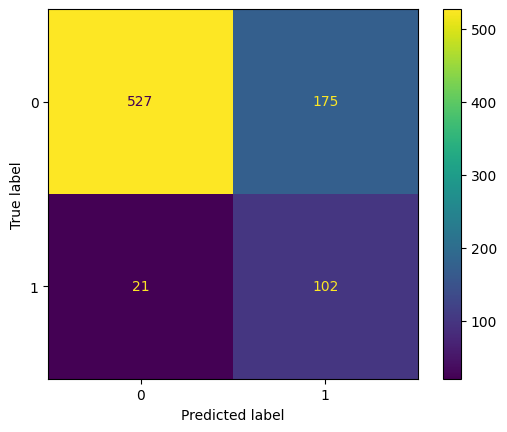

In [ ]:
cm = confusion_matrix(y_test, predictions, labels = np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = np.unique(y_test))
disp.plot()